<a href="https://colab.research.google.com/github/lisaliss-hub/customer-shopping-data/blob/main/Customer_Purchase_Behaviour_%26_Segmentation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Purchase Behaviour and Segmentation Analysis

## Introduction

This project aims to explore, analyze and model customer shopping behaviour using real retail transaction data. By examining purchasing patterns, customer demographics, and customer spending trends, we generate insights that can inform strategic business decisions and marketing efforts.

**Objectives**
1. Understand customer demographics and purchase patterns
2. Analse sales performance across categories and malls
3. Identify high-value and loyal customers using RFM analysis
4. Segment customers using clustering algorithms
5. Predict customer spending habits using machine learning models

# Data Cleaning and Preprocessing

In [ ]:
from google.colab import files
uploaded = files.upload()
print(uploaded)

Saving customer_shopping_data (1).csv to customer_shopping_data (1).csv
{'customer_shopping_data (1).csv': b'invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall\r\nI138884,C241288,Female,28,Clothing,5,1500.4,Credit Card,5/8/2022,Kanyon\r\nI317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul\r\nI127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity\r\nI173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM\r\nI337046,C189076,Female,53,Books,4,60.6,Cash,24/10/2021,Kanyon\r\nI227836,C657758,Female,28,Clothing,5,1500.4,Credit Card,24/05/2022,Forum Istanbul\r\nI121056,C151197,Female,49,Cosmetics,1,40.66,Cash,13/03/2022,Istinye Park\r\nI293112,C176086,Female,32,Clothing,2,600.16,Credit Card,13/01/2021,Mall of Istanbul\r\nI293455,C159642,Male,69,Clothing,3,900.24,Credit Card,4/11/2021,Metrocity\r\nI326945,C283361,Female,60,Clothing,2,600.16,Credit Card,22/08/2021,Kanyon\r\nI306368,C240286

In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




In [ ]:
#Load the dataset
df = pd.read_csv('customer_shopping_data (1).csv')

In [ ]:
# Check the size of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [ ]:
#Display first few rows
print(df.head())

  invoice_no customer_id  gender  age  category  quantity    price  \
0    I138884     C241288  Female   28  Clothing         5  1500.40   
1    I317333     C111565    Male   21     Shoes         3  1800.51   
2    I127801     C266599    Male   20  Clothing         1   300.08   
3    I173702     C988172  Female   66     Shoes         5  3000.85   
4    I337046     C189076  Female   53     Books         4    60.60   

  payment_method invoice_date   shopping_mall  
0    Credit Card     5/8/2022          Kanyon  
1     Debit Card   12/12/2021  Forum Istanbul  
2           Cash    9/11/2021       Metrocity  
3    Credit Card   16/05/2021    Metropol AVM  
4           Cash   24/10/2021          Kanyon  


In [ ]:
#Check the number of columns
print(df.columns)

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')


In [ ]:
print(df.describe())

                age      quantity         price
count  99457.000000  99457.000000  99457.000000
mean      43.427089      3.003429    689.256321
std       14.990054      1.413025    941.184567
min       18.000000      1.000000      5.230000
25%       30.000000      2.000000     45.450000
50%       43.000000      3.000000    203.300000
75%       56.000000      4.000000   1200.320000
max       69.000000      5.000000   5250.000000


In [ ]:
print(df.shape)

(99457, 10)


In [ ]:
#Check if numeric columns are in integer form
print(df.dtypes)

invoice_no         object
customer_id        object
gender             object
age                 int64
category           object
quantity            int64
price             float64
payment_method     object
invoice_date       object
shopping_mall      object
dtype: object


In [ ]:
#Check for missing values
print(df.isnull().sum())

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64


In [ ]:
#Drop rows with duplicate records
df = df.drop_duplicates()


In [ ]:
#Create the total_amount column
df['total_amount'] = df['quantity'] * df['price']

In [ ]:
#Check if the total_amount column was added successfully
print(df.columns)

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall',
       'total_amount'],
      dtype='object')


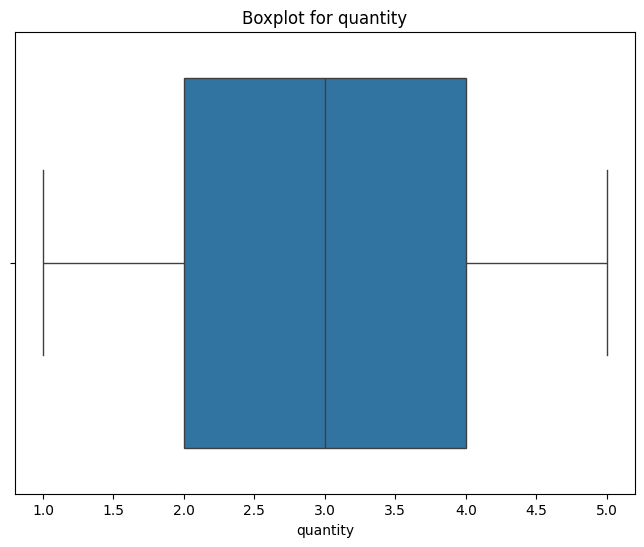

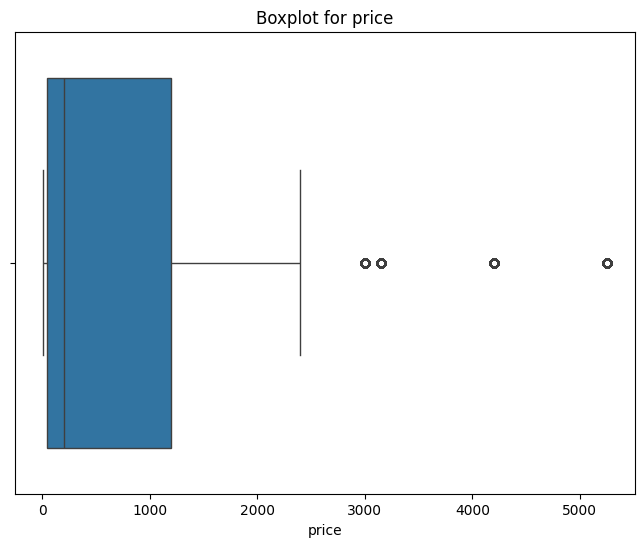

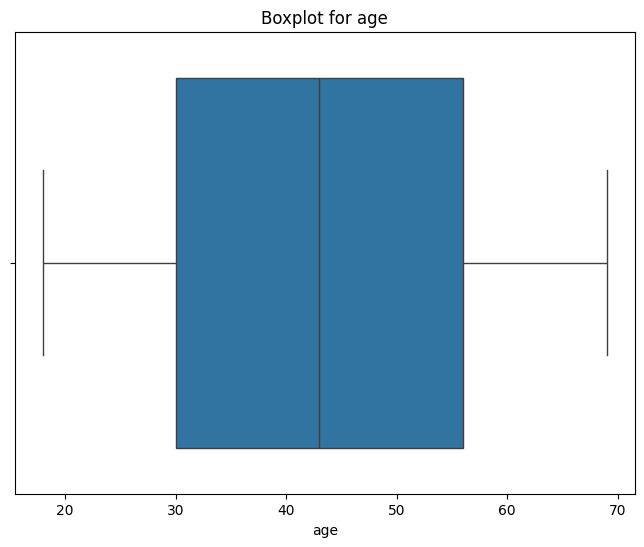

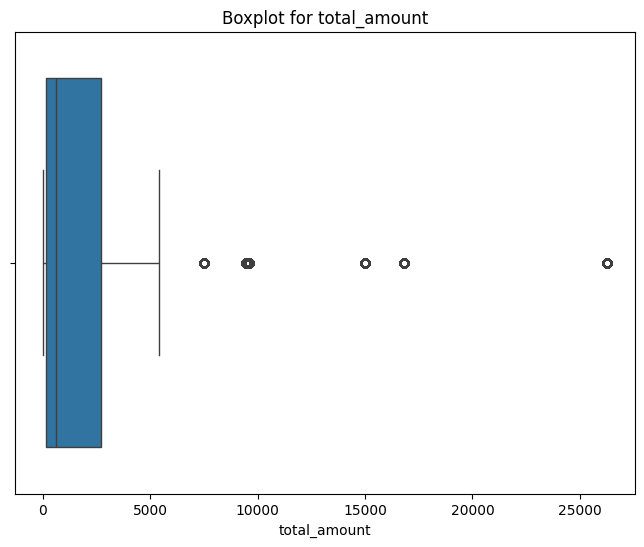

In [ ]:
#Function to generate boxplots for visualization of outliers
def generate_boxplots(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    for column in numeric_columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot for {column}')
        plt.show()
#Generate boxplots for key columns
check_outliers_columns = ['quantity', 'price', 'age', 'total_amount']
generate_boxplots(df[check_outliers_columns])

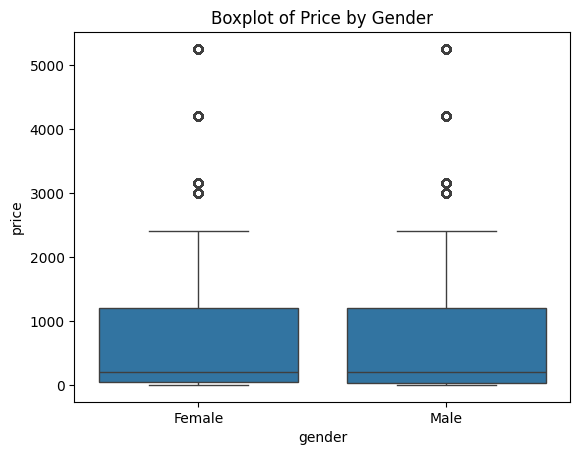

In [ ]:
#Generate boxplots to show the relationship between variables
sns.boxplot(x='gender', y='price', data=df)
plt.title('Boxplot of Price by Gender')
plt.show()

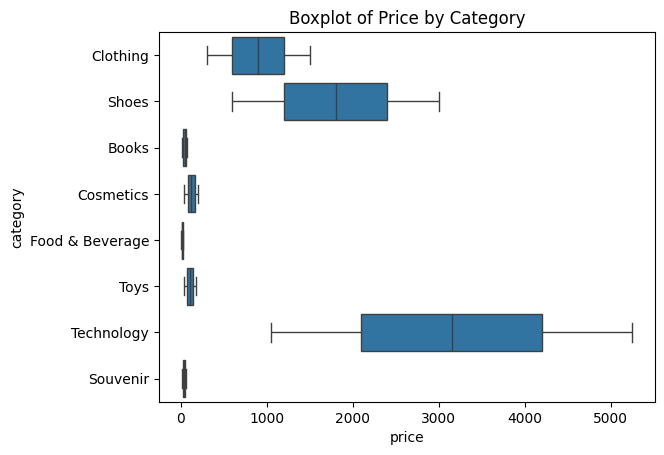

In [ ]:
sns.boxplot(x='price', y='category', data=df)
plt.title('Boxplot of Price by Category')
plt.show()

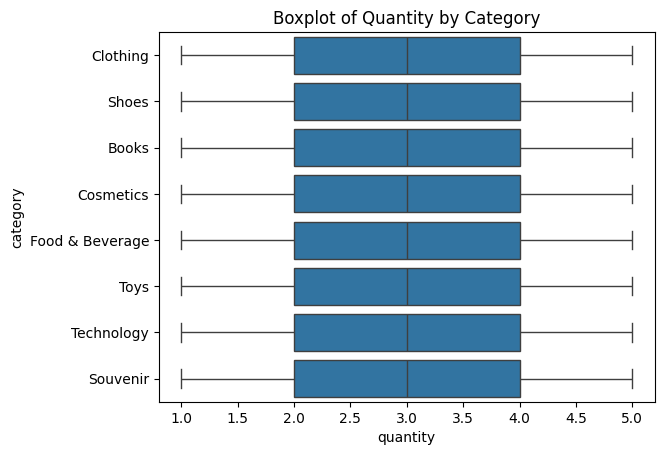

In [ ]:
sns.boxplot(x='quantity', y='category', data=df)
plt.title('Boxplot of Quantity by Category')
plt.show()

Based on the above graphs there are outliers

In [ ]:
#Handle outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

#Function to cap outliers using 1st and 99th percentiles
def cap_outliers(df, column):
    lower_bound = df[column].quantile(0.01)
    upper_bound = df[column].quantile(0.99)
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

#Apply removal to quantity and total_amount
df = remove_outliers(df, 'quantity')
df = remove_outliers(df, 'total_amount')

#Apply capping to price
df = cap_outliers(df, 'price')
df = cap_outliers(df, 'age')


#Check dataset after handling outliers
print(df.head())
print(df.shape)
print (df.describe())


  invoice_no customer_id  gender   age   category  quantity    price  \
1    I317333     C111565    Male  21.0      Shoes         3  1800.51   
2    I127801     C266599    Male  20.0   Clothing         1   300.08   
4    I337046     C189076  Female  53.0      Books         4    60.60   
6    I121056     C151197  Female  49.0  Cosmetics         1    40.66   
7    I293112     C176086  Female  32.0   Clothing         2   600.16   

  payment_method invoice_date     shopping_mall  total_amount  
1     Debit Card   12/12/2021    Forum Istanbul       5401.53  
2           Cash    9/11/2021         Metrocity        300.08  
4           Cash   24/10/2021            Kanyon        242.40  
6           Cash   13/03/2022      Istinye Park         40.66  
7    Credit Card   13/01/2021  Mall of Istanbul       1200.32  
(85471, 11)
                age      quantity         price  total_amount
count  85471.000000  85471.000000  85471.000000  85471.000000
mean      43.413474      2.735700    404.884743

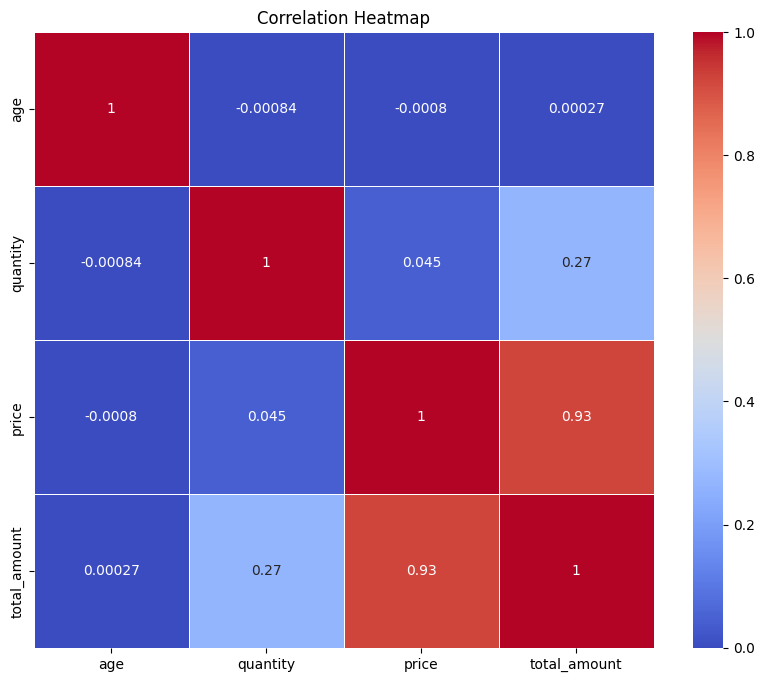

In [ ]:
#Select numeric columns
numerical_df = df.select_dtypes(include=[np.number])

#Compute the correlation matrix
correlation_matrix = numerical_df.corr()

#Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


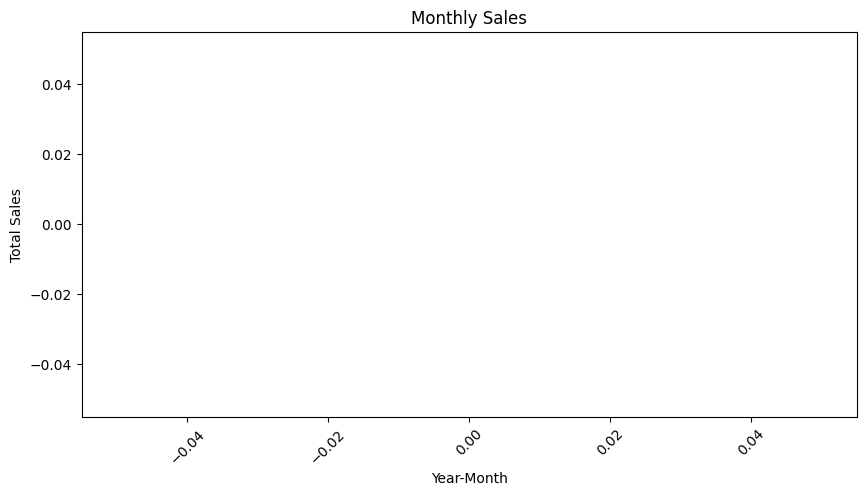

In [ ]:
#Visualize Monthly Sales

#Convert invoice_date to datetime format
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format= '%d%m%y', errors='coerce')

#Extract month and year
df['yearmonth']= df['invoice_date'].dt.to_period('M')

#Group by yearmonth and sum total _amount
#Visualize Monthly Sales

#Convert invoice_date to datetime format
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format= '%d%m%y', errors='coerce')

#Extract month and year
df['yearmonth']= df['invoice_date'].dt.to_period('M')

#Group by yearmonth and sum total _amount
monthly_sales = df.groupby('yearmonth')['total_amount'].sum()

plt.figure(figsize=(10, 5))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o', linestyle='-')
plt.title('Monthly Sales')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()



gender
Female    58222362.19
Male      38971196.97
Name: total_amount, dtype: float64


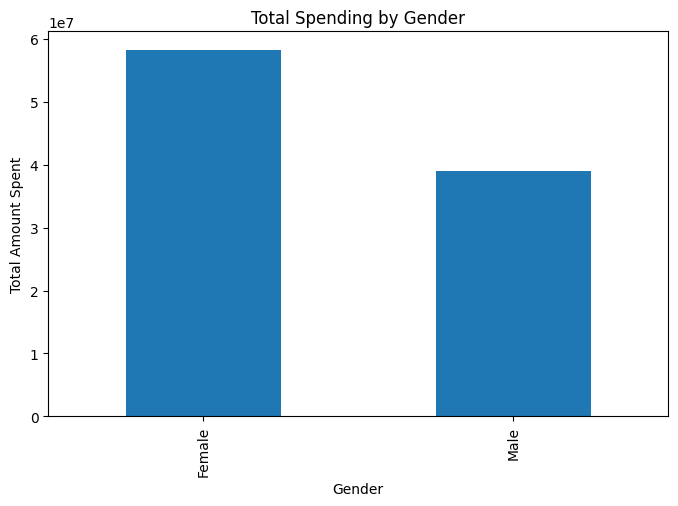

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

In [ ]:
#Visualize Gender Spending Trends
gender_spending= df.groupby('gender')['total_amount'].sum()
print(gender_spending)

plt.figure(figsize=(8, 5))
gender_spending.plot(kind='bar')
plt.title('Total Spending by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Amount Spent')
plt.show()
plt


In [ ]:
#Gender spending trends
female_purchases= df[df['gender'] == 'Female']
male_purchases= df[df['gender'] == 'Male']
print('total purchases made by females:', len(female_purchases))
print('total purchases made by males:', len(male_purchases))

total purchases made by females: 51165
total purchases made by males: 34306


category
Clothing      61932911.04
Shoes         16933196.38
Cosmetics      6792862.90
Technology     5234250.00
Toys           3980426.24
Name: total_amount, dtype: float64


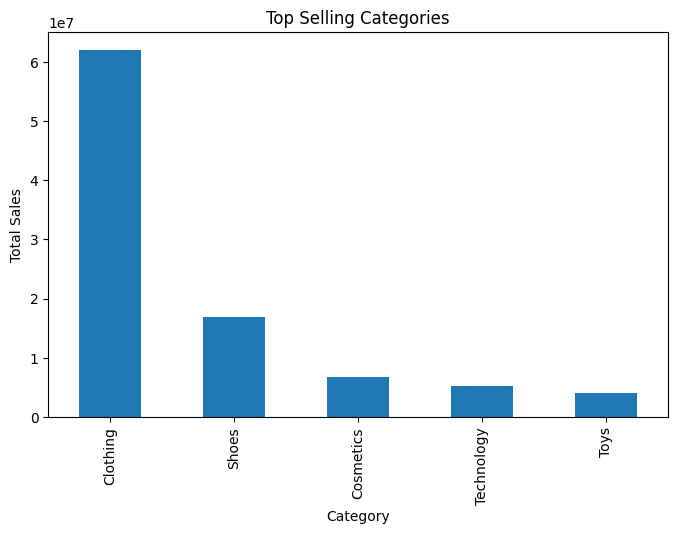

shopping_mall
Mall of Istanbul    19441509.51
Kanyon              19234170.71
Metrocity           14731973.40
Metropol AVM        10073730.91
Istinye Park         9517477.04
Name: total_amount, dtype: float64


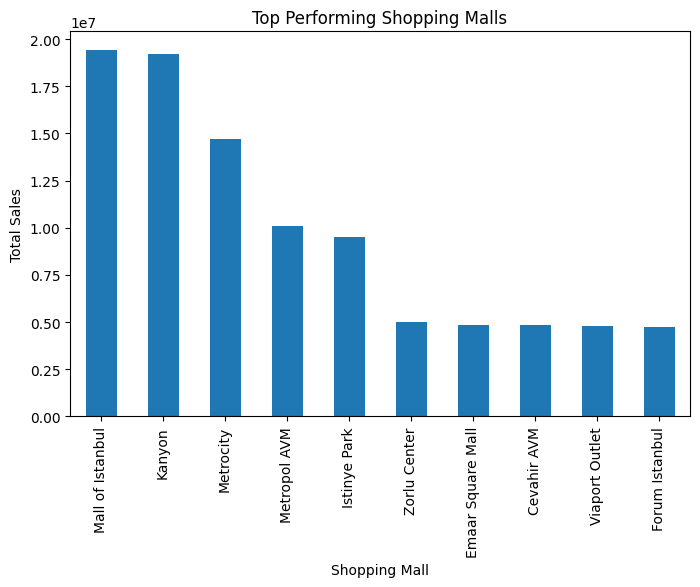

In [ ]:
#Top selling categories
top_categories = df.groupby('category')['total_amount'].sum().sort_values(ascending=False).nlargest(5)
print(top_categories.head(5))

#Bar Plot for representation
plt.figure(figsize=(8, 5))
top_categories.plot(kind='bar')
plt.title('Top Selling Categories')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

#Best Performing mall
top_malls = df.groupby('shopping_mall')['total_amount'].sum().sort_values(ascending=False)
print(top_malls.head(5))

#Bar Plot for representation
plt.figure(figsize=(8, 5))
top_malls.plot(kind='bar')
plt.title('Top Performing Shopping Malls')
plt.xlabel('Shopping Mall')
plt.ylabel('Total Sales')
plt.show()

Based on the findings:
* Gender spending trends- Females shop more than males. Females having 41111 purchases while men have 27594 purchases.
* Top categories and mall performance(sale) - Most purchased categories were clothing, cosmetics shoes and technology. These categories are ideal for promotions or loyalty programs.
- Top performing malls were Mall of Istanbul and Kanyon having the highest number of transactions. They may be in high-traffic location or offer more desirerable shopping experiences.
* Monthly sales trends- Revenue is steady throughout the year with the highest selling months being July: 10.3M and October: 10.2M. February and June show slightly lower sales. This could suggest seasonal shopping patterns (eg summer sales, pre-holiday shopping).
* Correlation Insights- Age vs Spending- Younger customers tend to buy frequently but may spend less per purchase while the older customers may shop less often but spend more.

# Feature Engineering

** Creating relevant features from the existing dataset**

In [ ]:
#Identify date of week /month of purchase
df['day_of_week'] = df['invoice_date'].dt.day_name()
df['month'] = df['invoice_date'].dt.month_name()
df['hour'] = df['invoice_date'].dt.hour

In [ ]:
#Identify customer age group
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 30, 45, 60, 100], labels = ['Teen', 'Young', 'Adult','Mid-age', 'Senior'])

In [ ]:
#Identify revenue per customer
customer_spend = df.groupby('customer_id')['total_amount'].sum(). rename('customer_total_spent')
df = df.merge(customer_spend, on='customer_id')


In [ ]:
#Identify category frequency per customer
category_freq = df.groupby(['customer_id', 'category']).size().unstack(fill_value=0)

In [ ]:
#Identify loyalty score or Frequency
purchase_counts = df.groupby('customer_id')['invoice_no'].nunique().rename('purchase_frequency')
df = df.merge(purchase_counts, on='customer_id')

In [ ]:
#Recency since last purchase
last_purchase_date = df.groupby('customer_id')['invoice_date'].max().rename('last_purchase_date')
df = df.merge(last_purchase_date, on= 'customer_id')

#Recency calculation in days
df['recency'] = (df['invoice_date'].max() - df['last_purchase_date']).dt.days

#Convert recency to days and handle potential NaNs
df['recency'] = df['recency'].fillna(df['recency'].median()) #Fill anyremaining NaNs with median recency

In [ ]:
#Gender based category preference
gender_category_pref = df.groupby(['gender', 'category']).size().unstack(fill_value=0)

In [ ]:
#1. Product Preferences:
#Calculate category frequency per customer
category_freq = df.groupby(['customer_id', 'category']).size().unstack(fill_value=0)
category_freq.columns = ['category_' + col for col in category_freq.columns]

#Initialize cluster_data with customer_id before merging
cluster_data = df[['customer_id']].drop_duplicates()

if cluster_data.empty:
  raise ValueError("cluster_data is empty before merging with category_freq. Check previous steps.")


#Merge with cluster_data
cluster_data = cluster_data.merge( category_freq, on='customer_id', how='left')

#2. Demographic Information:
cluster_data = cluster_data.merge(df[['customer_id', 'age_group', 'gender']], on= 'customer_id', how='left', suffixes=('', '_df'))

#3. Spending Habits:
existing_cols = ['customer_total_spent', 'purchase_frequency', 'recency']
for col in existing_cols:
    if col in cluster_data.columns:
        cluster_data = cluster_data.drop(columns=col)

cluster_data = cluster_data.merge(df[['customer_id', 'customer_total_spent', 'purchase_frequency', 'recency']], on='customer_id', how='left', )


from sklearn.preprocessing import OneHotEncoder

#One-hot encode categorical features (age_group, gender)
categorical_features = ['age_group', 'gender']
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
encoded_features = encoder.fit_transform(cluster_data[categorical_features])
encoded_df = pd.DataFrame(encoded_features,columns= encoder.get_feature_names_out(categorical_features))
cluster_data = pd.concat([cluster_data, encoded_df], axis=1)
cluster_data = cluster_data.drop(columns=categorical_features)

#3. Average Order Value:
avg_order_value = df.groupby('customer_id')['total_amount'].mean().rename('avg_order_value')

expected_cols = ['category_' + col for col in df['category']. unique()]
for col in expected_cols:
    if col not in cluster_data.columns:
        cluster_data[col] = 0


cluster_data = cluster_data.merge(category_freq, on= 'customer_id', how='left', suffixes=('', '_y'))
cluster_data.fillna(0, inplace=True)
cluster_data = cluster_data.merge(avg_order_value, on='customer_id', how='left')

#Apply K-Means Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


print("shape of cluster_data before imputation:", cluster_data.shape)
print("columns of cluster_data before imputation:", cluster_data.columns)


#Impute missing values before scaling
imputer = SimpleImputer(strategy='mean')
cluster_data_for_imputation = cluster_data.drop(columns=['customer_id'])

print("shape of cluster_data_for_imputation:", cluster_data_for_imputation.shape)
print("columns of cluster_data_for_imputation:", cluster_data_for_imputation.columns)

if cluster_data_for_imputation.empty:
  print("Warning: cluster_data_for_imputation is empty. Skipping imputation.")
  cluster_data_imputed = cluster_data_for_imputation
else:
  cluster_data_imputed_array = imputer.fit_transform(cluster_data_for_imputation)

print("shape of cluster_data_imputed_array:", cluster_data_imputed_array.shape)
print("type of cluster_data_imputed_array:", type(cluster_data_imputed_array))
print("shape of cluster_data_for_imputation.columns:", len(cluster_data_for_imputation.columns))
print("shape of cluster_data_for_imputation.index:", len(cluster_data_for_imputation.index))


num_expected_cols = len(cluster_data_for_imputation.columns)
num_actual_cols = cluster_data_imputed_array.shape[1]

if num_expected_cols != num_actual_cols:
  raise ValueError(f"Mismatch in columns: Expected {num_expected_cols}, got {num_actual_cols}.")

cluster_data_imputed = pd.DataFrame(cluster_data_imputed_array, columns=cluster_data_for_imputation.columns, index=cluster_data_for_imputation.index)


cluster_data_imputed = pd.concat([cluster_data[['customer_id']], cluster_data_imputed], axis=1)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_data_imputed.drop(columns=['customer_id']))
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_data['cluster'] = kmeans.fit_predict(scaled_features)

shape of cluster_data before imputation: (85471, 26)
columns of cluster_data before imputation: Index(['customer_id', 'category_Books', 'category_Clothing',
       'category_Cosmetics', 'category_Food & Beverage', 'category_Shoes',
       'category_Souvenir', 'category_Technology', 'category_Toys',
       'customer_total_spent', 'purchase_frequency', 'recency',
       'age_group_Mid-age', 'age_group_Senior', 'age_group_Teen',
       'age_group_Young', 'gender_Male', 'category_Books_y',
       'category_Clothing_y', 'category_Cosmetics_y',
       'category_Food & Beverage_y', 'category_Shoes_y', 'category_Souvenir_y',
       'category_Technology_y', 'category_Toys_y', 'avg_order_value'],
      dtype='object')
shape of cluster_data_for_imputation: (85471, 25)
columns of cluster_data_for_imputation: Index(['category_Books', 'category_Clothing', 'category_Cosmetics',
       'category_Food & Beverage', 'category_Shoes', 'category_Souvenir',
       'category_Technology', 'category_Toys', 'cu

# RFM Analysis

In [ ]:
reference_date = df['invoice_date'].max()
rfm = df.groupby('customer_id').agg({
    'invoice_date': lambda x: (reference_date - x.max()).days,
    'invoice_no': 'nunique',
    'total_amount': 'sum'
}).rename(columns={
    'invoice_date': 'recency',
    'invoice_no': 'frequency',
    'total_amount': 'monetary'
}).reset_index()

#Scoring and segmentation
rfm['recency'] = pd.to_numeric(rfm['recency'],errors='coerce')
rfm['recency'] = rfm['recency'].fillna(rfm['recency'].median())

try:
  rfm['R_Score'] = pd.qcut(rfm['recency'], 5, labels=False, duplicates='drop').astype(int)
except ValueError:
  rfm['R_Score'] = 1
try:
  rfm['F_Score'] = pd.qcut(rfm['frequency'], 5, labels=False, duplicates='drop').astype(int)
except ValueError:
  rfm['F_Score'] = 1
  try:
    rfm['M_Score'] = pd.qcut(rfm['monetary'], 5, labels=False, duplicates='drop').astype(int)
  except ValueError:
    rfm['M_Score'] = 1


if rfm['recency'].isnull().all() or (rfm['recency'] == 0).all():
  rfm['R_Score'] = 1
else:
  rfm['R_Score'] = pd.qcut(rfm['recency'], 5, duplicates='drop' ).astype(int)



def segment_customer(rfm_score):
  if rfm_score >=9:
    return 'Champions'
  elif rfm_score >= 6 and rfm_score < 9:
    return 'Loyal'
  elif rfm_score >= 4 and rfm_score < 6:
    return 'Potential Loyalists'
  elif rfm_score >= 2 and rfm_score < 4:
    return 'At Risk'
  else:
    return 'Lost'


rfm['RFM_Score'] = rfm[['R_Score', 'M_Score', 'F_Score']].astype(int).sum(axis=1)
rfm['Segment'] = rfm['RFM_Score'].apply(segment_customer)

print("rfm columns after RFM_Score calculation:", rfm.columns)
print("rfm['RFM_Score'] head:", rfm['RFM_Score'].head())

rfm columns after RFM_Score calculation: Index(['customer_id', 'recency', 'frequency', 'monetary', 'R_Score', 'F_Score',
       'M_Score', 'RFM_Score', 'Segment'],
      dtype='object')
rfm['RFM_Score'] head: 0    5
1    4
2    3
3    2
4    3
Name: RFM_Score, dtype: int64


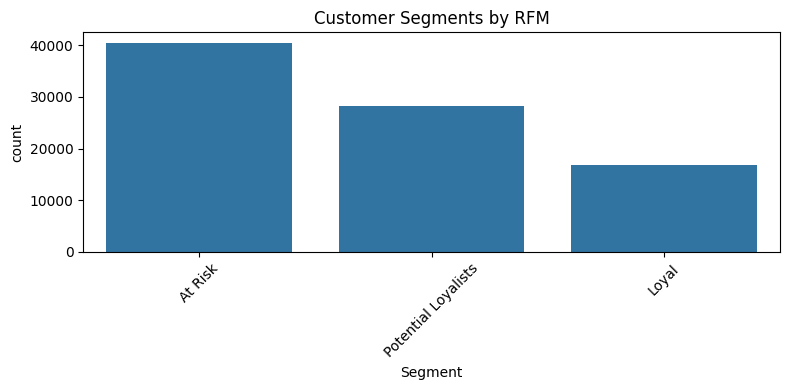

In [ ]:
#Visualization of Segments using a bar plot
plt.figure(figsize=(8,4))
sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index)
plt.title('Customer Segments by RFM')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualizing clusters with PCA

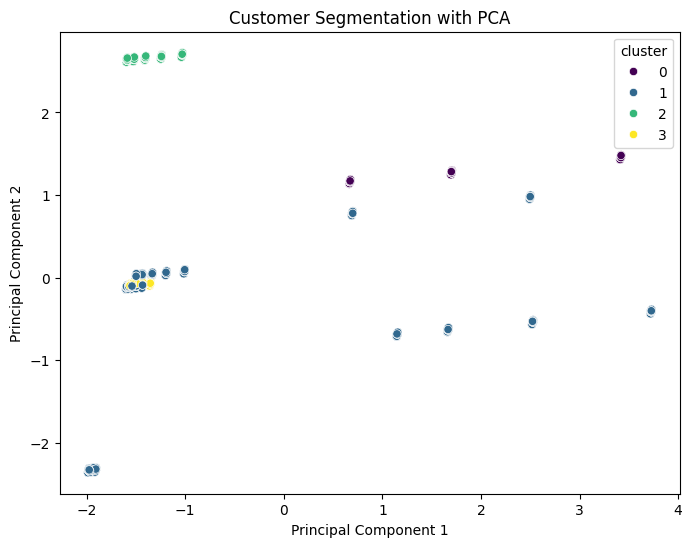

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['cluster'] = cluster_data['cluster']

#Visualizing  clusters using scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x= 'PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis')
plt.title('Customer Segmentation with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#Applying K-Means Clustering:

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#Prepare features for clustering
cluster_data = df[['customer_id', 'customer_total_spent', 'purchase_frequency', 'recency']].drop_duplicates()
#Remove rows with NaN values
cluster_data = cluster_data.dropna()

#Check if recency is Timedelta and then extract days
if pd.api.types.is_timedelta64_dtype(cluster_data['recency']):
    cluster_data['recency'] = cluster_data['recency'].dt.days.fillna(cluster_data['recency'].dt.days.median())
else:
  #If recency is already numeric(days), handle potential NaNs
  cluster_data['recency'] = cluster_data['recency'].fillna(cluster_data['recency'].median())


df['invoice_date'] = pd.to_datetime(df['invoice_date'], errors='coerce').fillna(pd.to_datetime('today'))

last_purchase_date = df.groupby('customer_id')['invoice_date'].max().rename('last_purchase_date')
df = df.merge(last_purchase_date, on='customer_id', suffixes=('', '_y'))

#Elbow method to find best k
from sklearn.cluster import KMeans
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    if not cluster_data.empty:
      scaled_features = cluster_data[['customer_total_spent','purchase_frequency', 'recency']]
      kmeans.fit(scaled_features)
      wcss.append(kmeans.inertia_)
    else:
      print("Warning: cluster_data is empty. Cannot calculate WCSS for k =", k)

if cluster_data.empty:
    print("Warning: cluster_data is empty after preprocessing. Check for data issues.")
    print("Possible reasons:")
    print("- Missing or invalid values in the selected columns.")
    print("- Incorrect data types for 'recency'.")
    print("- All rows were dropped due to NaN values.")
else:
    #Standardize features
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(cluster_data[['customer_total_spent', 'purchase_frequency', 'recency']])



    plt.plot(range(1, 11), wcss, marker='o')
    plt.title('Elbow Method - optimal K')
    plt.xlabel('Number of Clusters ')
    plt.ylabel('WCSS')
    plt.show()

    #Apply Kmeans with optimal K
    kmeans = KMeans(n_clusters=4, random_state=42)
    cluster_data['cluster'] = kmeans.fit_predict(scaled_features)

    #Visualize clusters
    sns.pairplot(cluster_data, hue='cluster', palette='tab10')
    plt.suptitle("Customer Segments", y=1.02)
    plt.show()


Possible reasons:
- Missing or invalid values in the selected columns.
- Incorrect data types for 'recency'.
- All rows were dropped due to NaN values.


# Random Forest Predictive Model Implementation

In [ ]:
#Create target variable
df['total_amount'] = df['quantity'] * df['price']


#Import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


#Initialize LabelEncoder
le_gender = LabelEncoder()
le_category = LabelEncoder()
le_mall = LabelEncoder()

df['gender_encoded'] = le_gender.fit_transform(df['gender'])
df['category_encoded'] = le_category.fit_transform(df['category'])
df['shopping_mall_encoded'] = le_mall.fit_transform(df['shopping_mall'])

#Features and target
features = ['age', 'category_encoded', 'shopping_mall_encoded', 'gender_encoded']
target = 'total_amount'

X = df[features]
y = df[target]


print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

print("NaN values in X:\n", X.shape)
print("NaN values in y:\n", y.isnull().sum())

#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#Predict and evaluate
y_pred = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Random Forest RMSE: {rmse:.2f}")
print(f"R-squared (R2): {r2}")


Shape of X: (85471, 4)
Shape of y: (85471,)
NaN values in X:
 (85471, 4)
NaN values in y:
 0
Random Forest RMSE: 1203.99
R-squared (R2): 0.4117955973517815


To predict customer behaviour, we implemented a Random Forest Regressor using demographic and behavioral features such as age, gender, product category, shopping mall and RFM scores. The target variable was total_amount representing total spend per transaction.
After training the model, we evaluated it using Root Mean Square Error (RMSE) and R^2 score. The results indicated the model was able to capture spensing trends to a reasonable extent. Feature importance analysis also highlighted which customer attributes contributed most to spending predictions.
This model serves as a foundation for personalized marketing, customer targeting  and predictive insights helping businesses better understand and engage with high value shoppers.